In [5]:
## Check the licenses and importing functions
import arcpy
arcpy.CheckOutExtension('Spatial')
arcpy.CheckOutExtension('ImageAnalyst')
from arcpy.sa import *
from arcpy.ia import *


In [2]:
## set the workspace
arcpy.env.workspace=r"E:\teaching\materials\python scripting arcgis\Ex10"


In [3]:
### Check the available raster datasets in a workspace
import arcpy
walk = arcpy.da.Walk()
for file in walk:
    print(file)

('E:\\teaching\\materials\\python scripting arcgis\\Ex10', [], ['bandradio.img', 'clipped_elev', 'elevation', 'landcover.tif', 'new_slope', 'tm.img', 'watershed_HUC12.shp'])


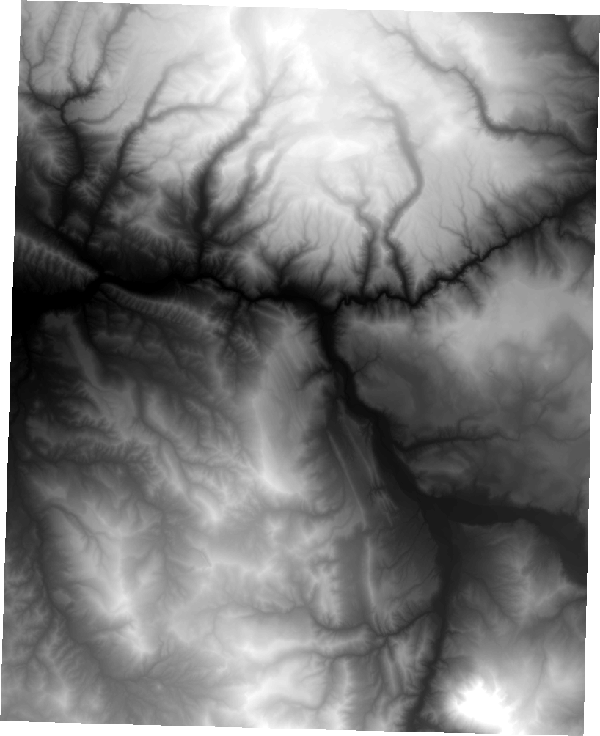

In [6]:
## Reading a raster to a Raster object

elev = Raster('elevation')
elev

In [3]:
p = arcpy.mp.ArcGISProject("CURRENT")
lyt = p.createLayout(11.5,8.5,'INCH',"Map for project")

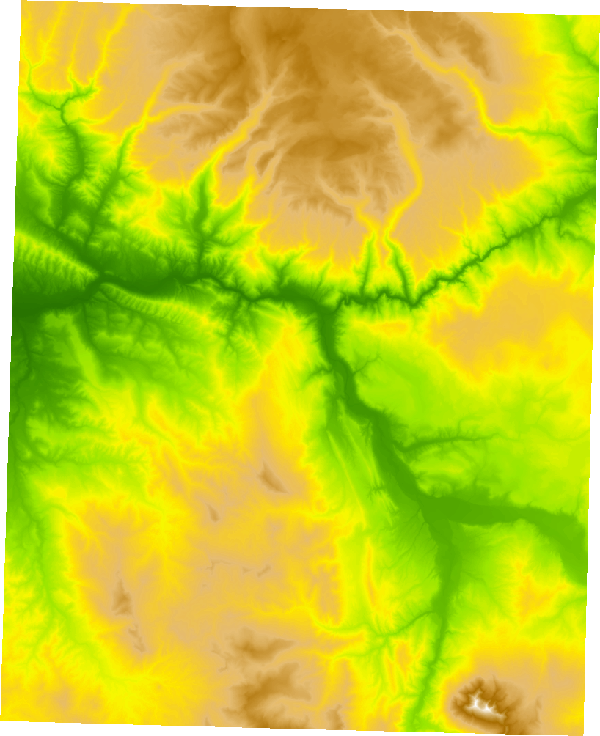

In [7]:
## display the elevation with color
arcpy.Render (elev, colormap="Elevation #10")

In [8]:
## Reading raster object properties 

for property in dir(elev):
    if "_" not in property:
        print(f"{property},\n")

RAT,

addDimension,

appendSlices,

bandCount,

bandNames,

bands,

blockSize,

catalogPath,

catalogPaths,

compressionType,

computeGSD,

computeHistograms,

computeStatistics,

exportImage,

extent,

format,

fromSTACItem,

functions,

getBandProperty,

getColormap,

getDimensionAttributes,

getDimensionNames,

getDimensionValues,

getHistograms,

getProperty,

getRasterBands,

getRasterInfo,

getStatistics,

getVariableAttributes,

hasRAT,

hasTranspose,

height,

isConstant,

isEmpty,

isInteger,

isMultidimensional,

isTemporary,

maximum,

mdinfo,

mean,

meanCellHeight,

meanCellWidth,

median,

minimum,

name,

names,

noDataValue,

noDataValues,

path,

pixelType,

properties,

read,

readOnly,

removeVariables,

renameBand,

renameVariable,

save,

setBandProperty,

setColormap,

setHistograms,

setProperty,

setStatistics,

setVariableAttributes,

slices,

spatialReference,

standardDeviation,

sum,

uncompressedSize,

variableNames,

variables,

vectorize,

width,

write,


In [21]:
ras = Raster('elevation')
print(ras.properties)
print(ras.compressionType)
print(dir(ras.getRasterInfo()))
print(ras.pixelType)
print(ras.spatialReference.name)

{'KIND': 'IMAGE', 'BAND_COUNT': 1, 'HAS_TABLE': False, 'HAS_XFORM': False, 'DataType': 'Generic'}
None
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'fromJSONString', 'getBandCount', 'getBlockHeight', 'getBlockWidth', 'getCellSize', 'getExtent', 'getNoDataValues', 'getPixelType', 'getSpatialReference', 'setBandCount', 'setBlockHeight', 'setBlockWidth', 'setCellSize', 'setExtent', 'setNoDataValues', 'setPixelType', 'setSpatialReference', 'toJSONString']
F32
NAD_1983_UTM_Zone_13N


In [ ]:
## Get the nubmer of pixels in the raster
print(elev.height,elev.width)

In [22]:
## Get the raster info using geRasterInfo()
elev_info = elev.getRasterInfo()
# for property in dir(elev_info):
#     if "_" not in property:
#         print(f"{property},\n")
print(elev_info.getCellSize())
print(elev_info.toJSONString())

(30.0, 30.0)
{"extent":{"xmin":273386.659099766635,"ymin":4345719.757663548,"xmax":322466.659099766635,"ymax":4405959.757663548,"spatialReference":{"wkid":26913,"latestWkid":26913}},"geodataXform":{"spatialReference":{"wkid":26913,"latestWkid":26913},"type":"IdentityXform"},"blockWidth":256,"blockHeight":16,"bandCount":1,"pixelType":"F32","noData":-3.40282347e+38,"pixelSizeX":30,"pixelSizeY":30,"format":"GRID","compressionType":"","firstPyramidLevel":1,"maximumPyramidLevel":3,"packetSize":4,"compressionQuality":0,"pyramidResamplingType":0,"statistics":[{"min":1655.9979248046875,"max":3942.435302734375,"mean":2515.2508869131989,"standardDeviation":435.59702849330694,"sum":7840215597.3214121,"median":2480.9086649999999,"skipX":1,"skipY":1,"count":3117071,"covariances":"189744.771232"}],"histograms":[{"size":256,"min":1655.997924804688,"max":3942.435302734375,"counts":[120,2723,3589,3366,3722,3911,4597,4646,5147,5783,6550,7263,7944,8167,8487,9620,10269,11099,9424,10223,10984,11153,12342,1

In [30]:
### Use json to show all raster info

import json
print(json.dumps(json.loads(elev_info.toJSONString()),indent=2))
json_out = json.dumps(json.loads(elev_info.toJSONString()),indent=2)


{
  "extent": {
    "xmin": 273386.65909976664,
    "ymin": 4345719.757663548,
    "xmax": 322466.65909976664,
    "ymax": 4405959.757663548,
    "spatialReference": {
      "wkid": 26913,
      "latestWkid": 26913
    }
  },
  "geodataXform": {
    "spatialReference": {
      "wkid": 26913,
      "latestWkid": 26913
    },
    "type": "IdentityXform"
  },
  "blockWidth": 256,
  "blockHeight": 16,
  "bandCount": 1,
  "pixelType": "F32",
  "noData": -3.40282347e+38,
  "pixelSizeX": 30,
  "pixelSizeY": 30,
  "format": "GRID",
  "compressionType": "",
  "firstPyramidLevel": 1,
  "maximumPyramidLevel": 3,
  "packetSize": 4,
  "compressionQuality": 0,
  "pyramidResamplingType": 0,
  "statistics": [
    {
      "min": 1655.9979248046875,
      "max": 3942.435302734375,
      "mean": 2515.250886913199,
      "standardDeviation": 435.59702849330694,
      "sum": 7840215597.321412,
      "median": 2480.908665,
      "skipX": 1,
      "skipY": 1,
      "count": 3117071,
      "covariances": "189

'{\n  "extent": {\n    "xmin": 273386.65909976664,\n    "ymin": 4345719.757663548,\n    "xmax": 322466.65909976664,\n    "ymax": 4405959.757663548,\n    "spatialReference": {\n      "wkid": 26913,\n      "latestWkid": 26913\n    }\n  },\n  "geodataXform": {\n    "spatialReference": {\n      "wkid": 26913,\n      "latestWkid": 26913\n    },\n    "type": "IdentityXform"\n  },\n  "blockWidth": 256,\n  "blockHeight": 16,\n  "bandCount": 1,\n  "pixelType": "F32",\n  "noData": -3.40282347e+38,\n  "pixelSizeX": 30,\n  "pixelSizeY": 30,\n  "format": "GRID",\n  "compressionType": "",\n  "firstPyramidLevel": 1,\n  "maximumPyramidLevel": 3,\n  "packetSize": 4,\n  "compressionQuality": 0,\n  "pyramidResamplingType": 0,\n  "statistics": [\n    {\n      "min": 1655.9979248046875,\n      "max": 3942.435302734375,\n      "mean": 2515.250886913199,\n      "standardDeviation": 435.59702849330694,\n      "sum": 7840215597.321412,\n      "median": 2480.908665,\n      "skipX": 1,\n      "skipY": 1,\n      

In [7]:
import arcpy
from arcpy import env
env.workspace = r"E:\teaching\materials\python scripting arcgis\Ex10"
raster = arcpy.Raster("tm.img")
print(raster.catalogPath)
desc = arcpy.da.Describe(raster)
print(desc["children"][0]["meanCellHeight"])
for rband in desc["children"]:
    print(rband["name"])

E:\teaching\materials\python scripting arcgis\Ex10\tm.img
0.0002777779999999973
Layer_1
Layer_2
Layer_3


In [32]:
desc

{'catalogPath': 'E:\\teaching\\materials\\python scripting arcgis\\Ex10\\tm.img',
 'FIDSet': None,
 'size': 12533142,
 'dateCreated': '2020-05-15T15:12:56.000',
 'dateAccessed': '2024-10-29T13:49:55.000',
 'dateModified': '2024-10-24T15:32:33.000',
 'workspace': <geoprocessing describe data object at 0x19847d58950>,
 'supportsBigObjectID': False,
 'supportsBigInteger': False,
 'supportsTimeOnly': False,
 'supportsDateOnly': False,
 'supportsTimestampOffset': False,
 'bandCount': 3,
 'baseName': 'tm',
 'canVersion': False,
 'changeTracked': False,
 'children': [{'catalogPath': 'E:\\teaching\\materials\\python scripting arcgis\\Ex10\\tm.img\\Layer_1',
   'FIDSet': None,
   'workspace': <geoprocessing describe data object at 0x19847d58d90>,
   'supportsBigObjectID': False,
   'supportsBigInteger': False,
   'supportsTimeOnly': False,
   'supportsDateOnly': False,
   'supportsTimestampOffset': False,
   'baseName': 'Layer_1',
   'canVersion': False,
   'changeTracked': False,
   'children'

In [33]:
raster.height
print(raster.noDataValue)

255.0


In [34]:
r_information = raster.getRasterInfo()
print(dir(r_information))
newRaster = arcpy.Raster(r_information)

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'fromJSONString', 'getBandCount', 'getBlockHeight', 'getBlockWidth', 'getCellSize', 'getExtent', 'getNoDataValues', 'getPixelType', 'getSpatialReference', 'setBandCount', 'setBlockHeight', 'setBlockWidth', 'setCellSize', 'setExtent', 'setNoDataValues', 'setPixelType', 'setSpatialReference', 'toJSONString']


In [8]:
#Raster calculator
print(arcpy.Raster('tm.img').bandNames)
band3 = arcpy.Raster('tm.img/Layer_3')
band1 = arcpy.Raster('tm.img/Layer_1')
bandratio = band3 / band1
bandratio.save('bandratio.img')

['Layer_1', 'Layer_2', 'Layer_3']


RuntimeError: ERROR 000872: Output Raster: Dataset E:\teaching\materials\python scripting arcgis\Ex10\bandratio.img already exists and cannot be overwritten since the Overwrite existing datasets option is disabled.

In [ ]:
band3[0,0]

: 

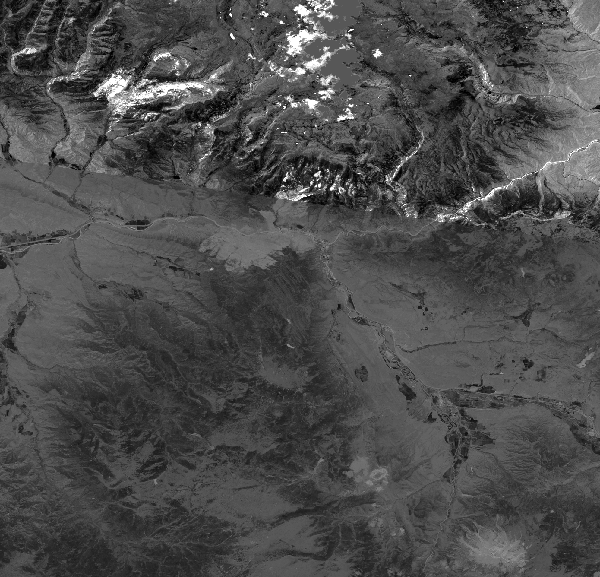

In [83]:
bandratio

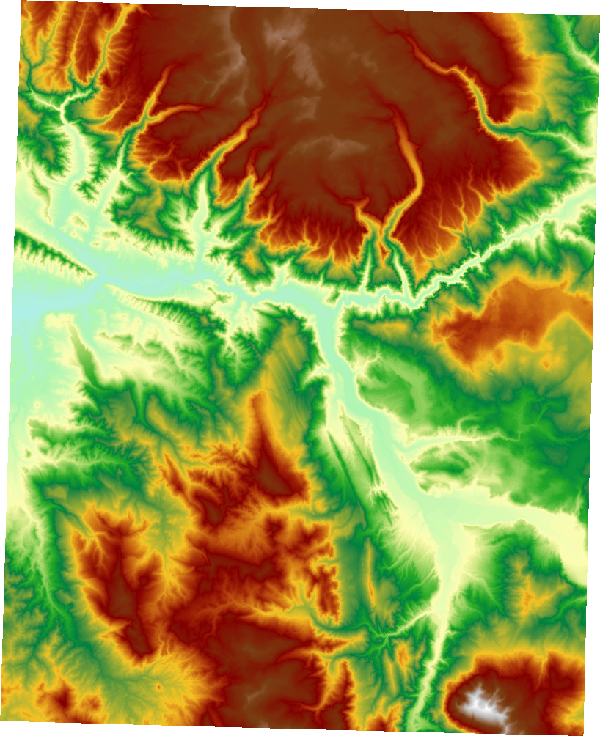

In [37]:
elev = arcpy.Raster("elevation")
arcpy.Render (elev, colormap="Elevation #1")

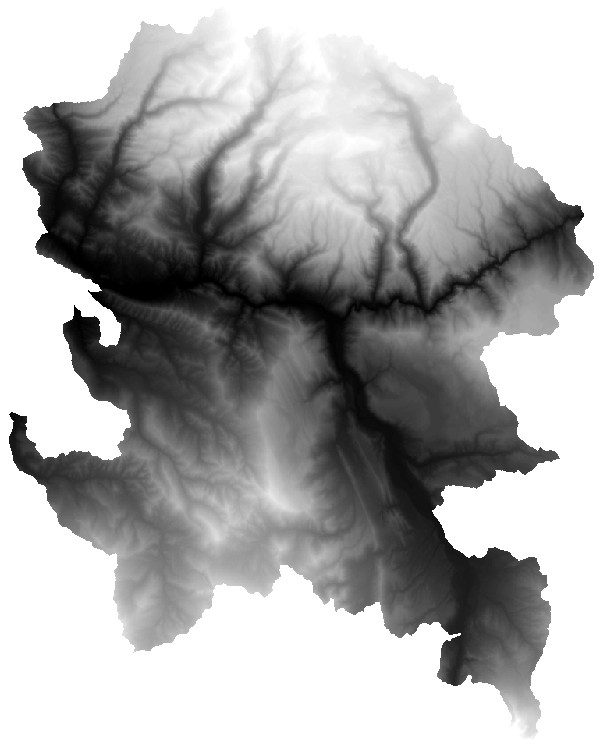

In [38]:
from arcpy.sa import *
from arcpy.ia import *
elev_clip = Clip(elev, "watershed_HUC12")
elev_clip

In [41]:
if arcpy.Exists('clipped_elev'):
    arcpy.management.Delete('clipped_elev')
elev.save('clipped_elev')

In [3]:
import arcpy
from arcpy import env
rastername ="tm.img"
rdesc = arcpy.da.Describe(rastername)
print(rdesc)

ValueError: Object: Error in accessing describe

In [ ]:
tm_raster = arcpy.Raster(rastername)
tm_raster.bandNames

## Get basic information about the raster data

### Print the raster information by the da.Describe function

In [44]:
import arcpy
from arcpy import env
rastername ="tm.img"
rdesc = arcpy.da.Describe(rastername)
for key,item in rdesc.items():
    print(key,item)

    

catalogPath E:\teaching\materials\python scripting arcgis\Ex10\tm.img
FIDSet None
size 12533142
dateCreated 2020-05-15T15:12:56.000
dateAccessed 2024-10-29T13:51:05.000
dateModified 2024-10-24T15:32:33.000
workspace <geoprocessing describe data object object at 0x0000019847D59E90>
supportsBigObjectID False
supportsBigInteger False
supportsTimeOnly False
supportsDateOnly False
supportsTimestampOffset False
bandCount 3
baseName tm
canVersion False
changeTracked False
children [{'catalogPath': 'E:\\teaching\\materials\\python scripting arcgis\\Ex10\\tm.img\\Layer_1', 'FIDSet': None, 'workspace': <geoprocessing describe data object object at 0x0000019847D5A110>, 'supportsBigObjectID': False, 'supportsBigInteger': False, 'supportsTimeOnly': False, 'supportsDateOnly': False, 'supportsTimestampOffset': False, 'baseName': 'Layer_1', 'canVersion': False, 'changeTracked': False, 'children': [], 'childrenExpanded': True, 'dataElementType': 'DERasterBand', 'datasetType': 'RasterBand', 'dataType': 

#### Read raster bands

In [2]:
import arcpy
tm_raster = arcpy.Raster(rastername)

for bandname in tm_raster.bandNames:

    band = arcpy.Raster(rastername + "/" + bandname)
    print(band[0,0])
    print(band.getStatistics())

NameError: name 'rastername' is not defined

### A comprehensive code to create maximum downslope values from an elevation model

In [46]:
# This script calculates the maximumm downslope for the raster cells 
import numpy as np
import arcpy
from arcpy.sa import Raster, RasterCellIterator
# read the elevation model
dem = Raster("elevation")
arcpy.env.overwriteOutput = True

#get knowledge about the input raster
raster_info = dem.getRasterInfo()
cell_x = dem.meanCellWidth
cell_y = dem.meanCellHeight

# change the raster info so the output type is float 32bit
raster_info.setPixelType("F32")
#create a new raster based on the raster info
new_slope = Raster(raster_info)
#update the raster using cell iterator
with RasterCellIterator({'rasters':[dem,new_slope]}) as rci:
    for r, c in rci:
        ## Get a list of slopes in the 8 neighbors
        slopes = []
        for x,y in [(-1,1),(-1,0),(-1,-1), (0,1),(0,-11),(1,-1),(1,1),(1,0)]:
            #check if the elevation is larger than the neighbor
            if dem[r,c] >= dem[r+x, c+y]:
                slope = abs(dem[r,c]- dem[r+x, c+y]) / np.sqrt((x*cell_x)**2 + (y*cell_y)**2)
                slopes.append(slope)
        if len(slopes) != 0:
            new_slope[r,c] = max(slopes)
        else:
            new_slope[r,c] = 0 #0 is undetermined
new_slope.save('new_slope')

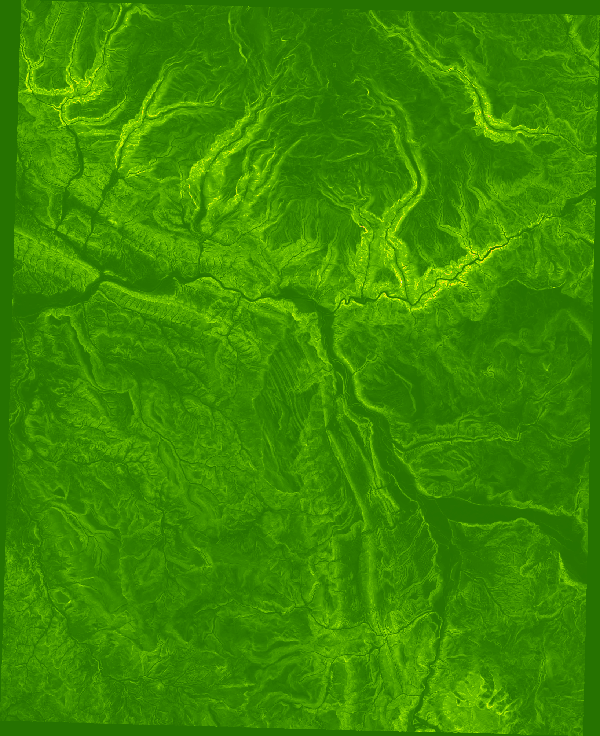

In [47]:
Render(new_slope,colormap="Elevation #10")

In [23]:
aprx = arcpy.mp.ArcGISProject('CURRENT')

In [26]:
aprx = arcpy.mp.ArcGISProject('CURRENT')
aprx.createLayout(11,8,'INCH')